**Let's find the Top rated movies,it's Ratings and Year in which it release**

In [8]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url ='https://www.imdb.com/chart/top'
rt = requests.get(url)
soup = BeautifulSoup(rt.text,'lxml')
print(soup.prettify())

**let's find movie names**

In [90]:
a = soup.find('tbody',class_='lister-list')
titles=a.find_all('a')
list_of_movies=[]
for title in titles:
  if title.text != ' \n':
    list_of_movies.append(title.text)


In [91]:
list_of_movies[0:5]

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Godfather Part II',
 '12 Angry Men']

**let's find Imdb Rating for movie**

In [88]:
ratings = soup.find_all('td',class_='ratingColumn imdbRating')
ratings[0].text.split('\n')[1]
list_of_ratings=[]
for rating in ratings:
  list_of_ratings.append(rating.text.split('\n')[1])
  


In [89]:
list_of_ratings[0:5]

['9.2', '9.2', '9.0', '9.0', '8.9']

**let's find year for each movie**

In [92]:
years = soup.find_all('span',class_='secondaryInfo')
years[0].text.split('(')[1][:4]
list_of_years =[]
for year in years:
  list_of_years.append(year.text.split('(')[1][:4])

In [146]:
list_of_years[0:5]

['1994', '1972', '2008', '1974', '1957']

**let's merge the all three lists by zip function**

In [97]:
data=list(zip(list_of_movies,list_of_ratings,list_of_years))

**Create the Dataframe from available data**

In [149]:
import pandas as pd
df = pd.DataFrame(data,columns=['Movies','Ratings','Year'])
df.index = np.arange(1, len(df) + 1)
df

,Movies,Ratings,Year
1,The Shawshank Redemption,9.2,1994
2,The Godfather,9.2,1972
3,The Dark Knight,9.0,2008
4,The Godfather Part II,9.0,1974
5,12 Angry Men,8.9,1957
...,...,...,...
246,Jai Bhim,8.0,2021
247,Aladdin,8.0,1992
248,Gandhi,8.0,1982
249,The Help,8.0,2011


**Let's do grouping by Rating column**

In [150]:
ratings=df.groupby(by='Ratings').size().reset_index().rename(columns={0:"No_of_movies"})


In [153]:
ratings =ratings.sort_values(['Ratings'],ascending=False)
ratings.index=np.arange(1,len(ratings)+1)
ratings

,Ratings,No_of_movies
1,9.2,2
2,9.0,2
3,8.9,3
4,8.8,4
5,8.7,6
6,8.6,11
7,8.5,18
8,8.4,19
9,8.3,33
10,8.2,47


In [154]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


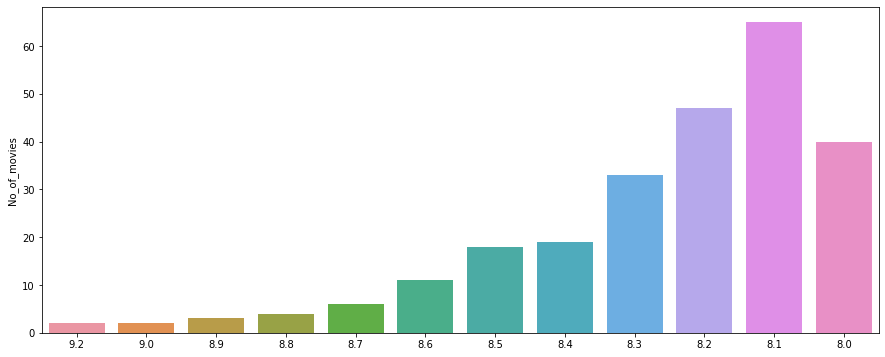

In [155]:
plt.figure(figsize=(15,6))
sns.barplot(x=ratings['Ratings'].value_counts().index,y=ratings['No_of_movies'])

In [156]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Convert the Dataframe into Excel**

In [157]:
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
df.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.
